In [2]:
import numpy as np
import pandas as pd
from utils.data_utils import perform_data_cleaning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
import dagshub
dagshub.init(repo_owner='Nikhil-MLOPs', repo_name='Delivery-Time-Prediction', mlflow=True)

Accessing as Nikhil-MLOPs

Initialized MLflow to track repo "Nikhil-MLOPs/Delivery-Time-Prediction"

Repository Nikhil-MLOPs/Delivery-Time-Prediction initialized!

In [4]:
import mlflow

In [5]:
# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow")

In [6]:

# mlflow experiment

mlflow.set_experiment("Exp 2 - Model Selection")

<Experiment: artifact_location='mlflow-artifacts:/87ff59c1207d4a4380a37c0fa3ce5f62', creation_time=1758380926037, experiment_id='2', last_update_time=1758380926037, lifecycle_stage='active', name='Exp 2 - Model Selection', tags={}>

In [7]:
from sklearn import set_config

set_config(transform_output="pandas")

## Load the Data

In [8]:
# load the data

df = pd.read_csv('notebooks/swiggy.csv')

## Clean Data

In [9]:
perform_data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,extracted_city,order_day,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,order_time_hour,time_of_day,distance_km,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,Saturday,1,15.0,11.0,morning,3.020737,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,Friday,0,5.0,19.0,evening,20.143737,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,Saturday,1,15.0,8.0,morning,1.549693,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,Tuesday,0,10.0,18.0,evening,7.774497,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,Saturday,1,15.0,13.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,Thursday,0,10.0,11.0,morning,1.488112,short
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,Wednesday,0,15.0,19.0,evening,NaN,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,Friday,0,15.0,23.0,night,4.648024,short
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,Monday,0,5.0,13.0,afternoon,6.219668,medium


In [10]:
# load the cleaned data

df = pd.read_csv('clean_data.csv')

df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,extracted_city,order_day,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,order_time_hour,time_of_day,distance_km,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,Saturday,1,15.0,11.0,morning,3.020737,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,Friday,0,5.0,19.0,evening,20.143737,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,Saturday,1,15.0,8.0,morning,1.549693,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,Tuesday,0,10.0,18.0,evening,7.774497,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,Saturday,1,15.0,13.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,Thursday,0,10.0,11.0,morning,1.488112,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,Wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,Friday,0,15.0,23.0,night,4.648024,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,Monday,0,5.0,13.0,afternoon,6.219668,medium


In [11]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'extracted_city', 'order_day', 'order_month',
       'order_day_of_week', 'order_is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'time_of_day', 'distance_km', 'distance_type'],
      dtype='object')

In [12]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "extracted_city",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

In [13]:
# check for missing values

df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
order_is_weekend          0
pickup_time_minutes    1640
time_of_day            2070
distance_km            3630
distance_type          3630
dtype: int64

<Axes: >

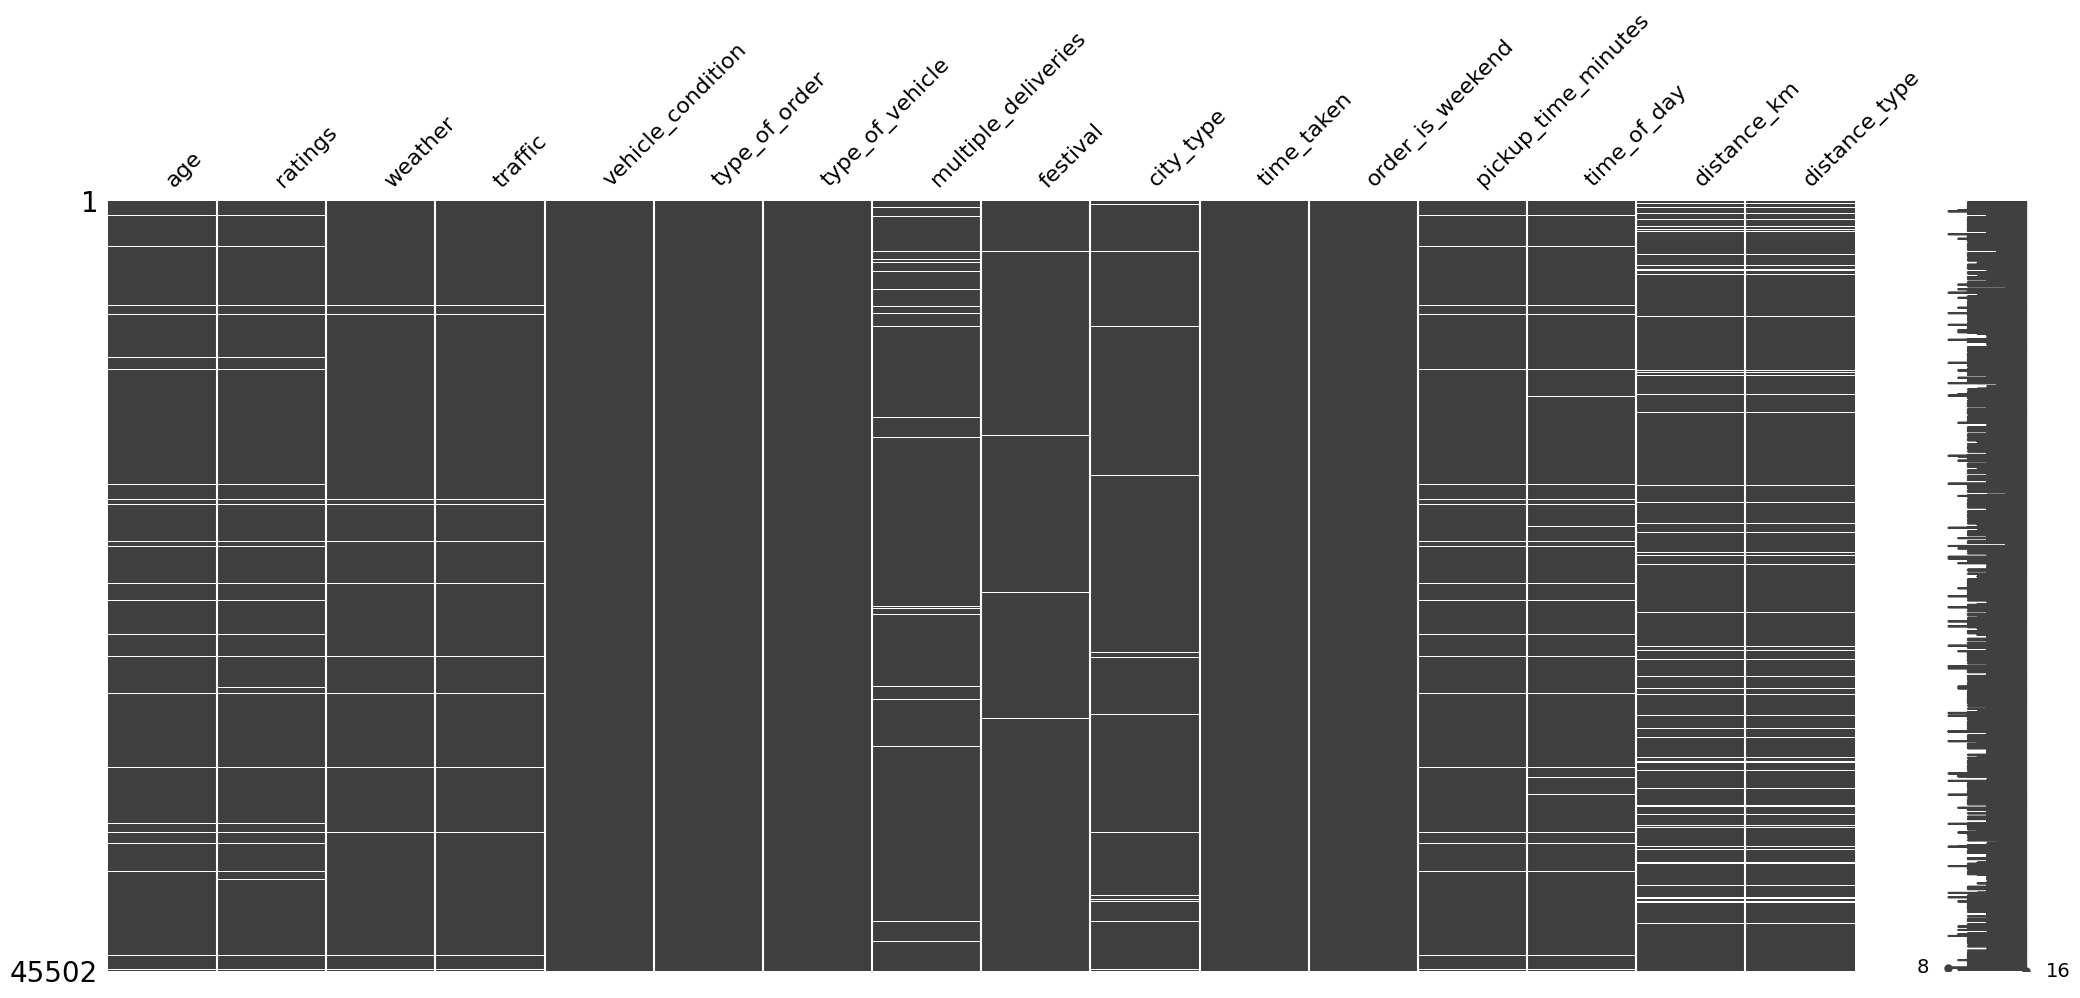

In [14]:
import missingno as msno

msno.matrix(df)

In [15]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'time_of_day',
       'distance_km', 'distance_type'],
      dtype='object')

## Drop Missing values

In [16]:

temp_df = df.copy().dropna()

In [17]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,order_is_weekend,pickup_time_minutes,time_of_day,distance_km,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.020737,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.143737,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.549693,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.774497,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.576800,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.488112,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,15.0,night,4.648024,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.219668,medium


In [18]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:

print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)
     

The size of train data is (30156, 15)
The shape of test data is (7539, 15)


In [20]:

# missing values in train data

X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
order_is_weekend       0
pickup_time_minutes    0
time_of_day            0
distance_km            0
distance_type          0
dtype: int64

In [21]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [22]:

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'time_of_day',
       'distance_km', 'distance_type'],
      dtype='object')

In [23]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)

np.float64(0.0)

## Pre Processing Pipeline

In [24]:
num_cols = ["age","ratings","pickup_time_minutes","distance_km"]

nominal_cat_cols = ['weather',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "_order_is_weekend",
                    "time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [25]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 '_order_is_weekend',
 'time_of_day']

In [26]:
X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
order_is_weekend       0
pickup_time_minutes    0
time_of_day            0
distance_km            0
distance_type          0
dtype: int64

In [27]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance_km"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "order_is_weekend",
                    "time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [28]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [29]:

# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [30]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

,transformers,"[('scale', ...), ('nominal_encode', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,False
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [31]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                # ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor)
                                # ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

,steps,"[('preprocess', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scale', ...), ('nominal_encode', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [32]:
# do data preprocessing

X_train_trans = processing_pipeline.fit_transform(X_train)

X_test_trans = processing_pipeline.transform(X_test)

f:\Project\Delivery-Time-Prediction\beta\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


In [33]:
X_train_trans

,age,ratings,pickup_time_minutes,distance_km,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,city_type_semi-urban,city_type_urban,order_is_weekend_1,time_of_day_evening,time_of_day_morning,time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.403775,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154040,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002414,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460433,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243420,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.452080,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612330,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322575,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004398,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [34]:
! pip install optuna xgboost lightgbm


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

f:\Project\Delivery-Time-Prediction\beta\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
from sklearn.metrics import r2_score, mean_absolute_error

In [37]:
def objective(trial):
    with mlflow.start_run(nested=True):
        model_name = trial.suggest_categorical("model",["SVM","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVM":
            kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,10)
                model = SVR(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,5)
                model = SVR(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,10)
                model = SVR(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,200)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,20)
            model = RandomForestRegressor(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,200)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingRegressor(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,25)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsRegressor(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,200)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,20)
            model = XGBRegressor(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMRegressor(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42)


        # train the model
        model.fit(X_train_trans,y_train_pt.values.ravel())

        # log model params
        mlflow.log_params(model.get_params())

        # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)

        # get the actual predictions values
        y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
        y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

        # calculate the error
        error = mean_absolute_error(y_test,y_pred_test_org)

        # log model_name
        mlflow.log_param("model",model_name)

        # log error
        mlflow.log_metric("MAE",error)

        return error

In [38]:
# create optuna study
study = optuna.create_study(direction="minimize",study_name="model_selection")

with mlflow.start_run(run_name="Best Model") as parent:
    # optimize the objective function
    study.optimize(objective,n_trials=30,n_jobs=-1)

    # log the best parameters
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

[I 2025-09-21 17:10:48,344] A new study created in memory with name: model_selection


🏃 View run popular-roo-502 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/6cbcd1c720d74cb18932dffb7322ae30
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:10:59,127] Trial 6 finished with value: 3.0741416971495177 and parameters: {'model': 'RF', 'n_estimators_rf': 32, 'max_depth_rf': 15}. Best is trial 6 with value: 3.0741416971495177.


🏃 View run secretive-ape-917 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/6f813e951cc24c378e098aefce569a7b
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:01,237] Trial 4 finished with value: 3.139686107635498 and parameters: {'model': 'XGB', 'n_estimators_xgb': 78, 'learning_rate_xgb': 0.2644967536649241, 'max_depth_xgb': 9}. Best is trial 6 with value: 3.0741416971495177.


🏃 View run thoughtful-conch-185 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/85e58439b5034a0c88d6232b762b3915
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:08,218] Trial 1 finished with value: 3.612290117708655 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 96, 'learning_rate_lgbm': 0.2983315325229823, 'max_depth_lgbm': 2}. Best is trial 6 with value: 3.0741416971495177.


🏃 View run capricious-stoat-277 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/7769da000e34429c8bc524673e9f19ae
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:11,215] Trial 0 finished with value: 3.037735132166544 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 157, 'learning_rate_lgbm': 0.2413708697355754, 'max_depth_lgbm': 15}. Best is trial 0 with value: 3.037735132166544.


🏃 View run sassy-ray-156 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/11d9b6426b994c2eaf5dd61cc7627413
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:19,483] Trial 8 finished with value: 4.305044871669205 and parameters: {'model': 'KNN', 'n_neighbors_knn': 5, 'weights_knn': 'distance'}. Best is trial 0 with value: 3.037735132166544.


🏃 View run peaceful-fawn-205 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/5c051ec3768b4db8b76da8dbe18a0a3d
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:22,227] Trial 9 finished with value: 3.4162858803895713 and parameters: {'model': 'RF', 'n_estimators_rf': 97, 'max_depth_rf': 9}. Best is trial 0 with value: 3.037735132166544.


🏃 View run whimsical-hawk-761 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/2c5024d80b3e4db8ab6413ef54957084
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:30,231] Trial 11 finished with value: 3.201277494430542 and parameters: {'model': 'XGB', 'n_estimators_xgb': 165, 'learning_rate_xgb': 0.20067087035631068, 'max_depth_xgb': 12}. Best is trial 0 with value: 3.037735132166544.


🏃 View run resilient-conch-925 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/291a66997af6467da36528688f69cfa0
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:36,217] Trial 12 finished with value: 4.313523788339813 and parameters: {'model': 'KNN', 'n_neighbors_knn': 25, 'weights_knn': 'uniform'}. Best is trial 0 with value: 3.037735132166544.


🏃 View run worried-newt-31 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/ffadc6e90eb2444c9fcb7b2bda4f7510
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2
🏃 View run capable-hare-359 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/b57bbb5c73d54dc19ad1b3393ee6b8aa
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:49,563] Trial 10 finished with value: 3.342320442199707 and parameters: {'model': 'XGB', 'n_estimators_xgb': 55, 'learning_rate_xgb': 0.22899030393636247, 'max_depth_xgb': 18}. Best is trial 0 with value: 3.037735132166544.
[I 2025-09-21 17:11:50,215] Trial 13 finished with value: 4.268265998661621 and parameters: {'model': 'KNN', 'n_neighbors_knn': 16, 'weights_knn': 'uniform'}. Best is trial 0 with value: 3.037735132166544.


🏃 View run fearless-jay-230 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/57549669682b45d5a64d358d8daec3dc
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2
🏃 View run clean-fawn-719 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/6c2fe5c47ac84ab9b94626581602a158
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:11:56,498] Trial 14 finished with value: 3.0867375667343255 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 77, 'learning_rate_lgbm': 0.42332769828514294, 'max_depth_lgbm': 11}. Best is trial 0 with value: 3.037735132166544.
[I 2025-09-21 17:11:58,205] Trial 15 finished with value: 3.2660765647888184 and parameters: {'model': 'XGB', 'n_estimators_xgb': 158, 'learning_rate_xgb': 0.4260692979714299, 'max_depth_xgb': 3}. Best is trial 0 with value: 3.037735132166544.


🏃 View run unique-owl-906 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/799835768f724469bdcb205e8cb81fdb
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:12:05,207] Trial 16 finished with value: 3.023459669226036 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 195, 'learning_rate_lgbm': 0.13026797175725474, 'max_depth_lgbm': 19}. Best is trial 16 with value: 3.023459669226036.


🏃 View run legendary-gull-865 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/79c68c1f5cb243979f52d8b351af220e
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:12:10,243] Trial 19 finished with value: 3.174589434336548 and parameters: {'model': 'RF', 'n_estimators_rf': 10, 'max_depth_rf': 20}. Best is trial 16 with value: 3.023459669226036.


🏃 View run thundering-shoat-557 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/72ab8099e8654df5b519e5449ded1fa3
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:12:16,241] Trial 7 finished with value: 3.4146514402771153 and parameters: {'model': 'GB', 'n_estimators_gb': 117, 'learning_rate_gb': 0.4574725949297678, 'max_depth_gb': 14}. Best is trial 16 with value: 3.023459669226036.


🏃 View run puzzled-sloth-958 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/b8c40fd77e2046c6864c24c374730947
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:12:22,571] Trial 21 finished with value: 3.0337698596724176 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 200, 'learning_rate_lgbm': 0.11107448684191037, 'max_depth_lgbm': 20}. Best is trial 16 with value: 3.023459669226036.


🏃 View run debonair-fox-804 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/1d50ef2e0b084205a07e4bb0a61aee77
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:12:29,771] Trial 22 finished with value: 3.0248034283780223 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 200, 'learning_rate_lgbm': 0.1080753771939231, 'max_depth_lgbm': 20}. Best is trial 16 with value: 3.023459669226036.


🏃 View run capricious-roo-965 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/6a817625b9224bc8ac5491bfb69d86a9
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:14:01,497] Trial 18 finished with value: 3.549523352930532 and parameters: {'model': 'GB', 'n_estimators_gb': 113, 'learning_rate_gb': 0.3116847370045941, 'max_depth_gb': 19}. Best is trial 16 with value: 3.023459669226036.


🏃 View run luxuriant-wasp-989 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/a14b0e6fa93d448098df19def7f206ad
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:18:52,188] Trial 3 finished with value: 4.675382646117031 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 0.8587564091432043}. Best is trial 16 with value: 3.023459669226036.


🏃 View run upset-elk-653 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/569efa69d92541a9b95a7b46bbf85c52
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:19:51,826] Trial 26 finished with value: 3.0341353493790795 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 197, 'learning_rate_lgbm': 0.10289934624739006, 'max_depth_lgbm': 20}. Best is trial 16 with value: 3.023459669226036.


🏃 View run nebulous-colt-179 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/8d8fd05631eb4876955087be1197d6ad
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:22:13,446] Trial 5 finished with value: 3.964730434672819 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 8.741244561623084, 'degree_poly': 2}. Best is trial 16 with value: 3.023459669226036.


🏃 View run luxuriant-grub-372 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/5f634999e55348858c0f0a6f546e4fba
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:22:59,879] Trial 28 finished with value: 3.0362373878016373 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 199, 'learning_rate_lgbm': 0.1100146523240043, 'max_depth_lgbm': 20}. Best is trial 16 with value: 3.023459669226036.


🏃 View run bald-rat-6 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/cadf202569d546c092b34d3eed101935
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:24:40,526] Trial 29 finished with value: 3.0481420144777513 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 161, 'learning_rate_lgbm': 0.16598312445288232, 'max_depth_lgbm': 20}. Best is trial 16 with value: 3.023459669226036.


🏃 View run omniscient-ape-299 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/fda5530ca7ff425eb57008ac3cc836e3
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:24:46,890] Trial 17 finished with value: 3.7244816254405437 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 0.783066538042017, 'degree_poly': 4}. Best is trial 16 with value: 3.023459669226036.


🏃 View run gentle-goose-456 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/4a4b0c5ae49d432e9bf1333d21f5719f
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:27:12,373] Trial 20 finished with value: 4.6754372138968465 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 4.87092608703354}. Best is trial 16 with value: 3.023459669226036.


🏃 View run rogue-wren-971 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/1837f99c034d4ed5b78a21928c427c04
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:29:30,261] Trial 24 finished with value: 4.675375541209495 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 4.920496729238298}. Best is trial 16 with value: 3.023459669226036.


🏃 View run bemused-lark-144 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/ff1ba95a03b44106887fa3ded469a146
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:31:40,900] Trial 25 finished with value: 4.675418263119786 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 6.015169039733793}. Best is trial 16 with value: 3.023459669226036.


🏃 View run nebulous-kite-108 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/ad78f691040440c99719bdea4b9565cd
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:35:27,965] Trial 23 finished with value: 6.239714451522582 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 79.00415909101781, 'gamma_rbf': 4.34146493043312}. Best is trial 16 with value: 3.023459669226036.


🏃 View run sassy-cat-254 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/c80932f9c5eb47bc9587e91663320dd0
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:39:43,203] Trial 27 finished with value: 5.259210308803901 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 28.94198376702723, 'gamma_rbf': 2.045336537609112}. Best is trial 16 with value: 3.023459669226036.


🏃 View run gaudy-yak-55 at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/7f6d417c3475483ba832208e52a3afe2
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


[I 2025-09-21 17:44:16,472] Trial 2 finished with value: 3.6523812894291883 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 2.8513702909715475, 'degree_poly': 4}. Best is trial 16 with value: 3.023459669226036.


🏃 View run Best Model at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2/runs/ded292d2f2a64f4b895933e2392fae37
🧪 View experiment at: https://dagshub.com/Nikhil-MLOPs/Delivery-Time-Prediction.mlflow/#/experiments/2


In [39]:
# best parameter value

study.best_params

{'model': 'LGBM',
 'n_estimators_lgbm': 195,
 'learning_rate_lgbm': 0.13026797175725474,
 'max_depth_lgbm': 19}

In [40]:
# best score in minutes.

study.best_value

3.023459669226036

In [41]:
lgbm_params = {
    "n_estimators": 145,
    "learning_rate": 0.16632111599858262,
    "max_depth": 17
}

In [42]:
# train the model on best parameters

lgbm = LGBMRegressor(**lgbm_params)

lgbm.fit(X_train_trans,y_train_pt.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 25
[LightGBM] [Info] Start training from score -0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,17
,learning_rate,0.16632111599858262
,n_estimators,145
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [43]:
# get the predictions
y_pred_train = lgbm.predict(X_train_trans)
y_pred_test = lgbm.predict(X_test_trans)

In [44]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [45]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 2.78 minutes
The test error is 3.02 minutes


In [46]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.86
The test r2 score is 0.84


In [47]:
# dataframe of results

study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_c_linear,params_c_poly,params_c_rbf,params_degree_poly,params_gamma_rbf,...,params_max_depth_rf,params_max_depth_xgb,params_model,params_n_estimators_gb,params_n_estimators_lgbm,params_n_estimators_rf,params_n_estimators_xgb,params_n_neighbors_knn,params_weights_knn,state
0,0,3.037735,2025-09-21 17:10:49.341322,2025-09-21 17:11:11.215782,0 days 00:00:21.874460,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,157.0,NaN,NaN,NaN,NaN,COMPLETE
1,1,3.612290,2025-09-21 17:10:49.342323,2025-09-21 17:11:08.217271,0 days 00:00:18.874948,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,96.0,NaN,NaN,NaN,NaN,COMPLETE
2,2,3.652381,2025-09-21 17:10:49.343984,2025-09-21 17:44:16.472015,0 days 00:33:27.128031,NaN,2.851370,NaN,4.0,NaN,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
3,3,4.675383,2025-09-21 17:10:49.345993,2025-09-21 17:18:52.188995,0 days 00:08:02.843002,0.858756,NaN,NaN,NaN,NaN,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
4,4,3.139686,2025-09-21 17:10:49.346997,2025-09-21 17:11:01.236554,0 days 00:00:11.889557,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,XGB,NaN,NaN,NaN,78.0,NaN,NaN,COMPLETE
5,5,3.964730,2025-09-21 17:10:49.348347,2025-09-21 17:22:13.446279,0 days 00:11:24.097932,NaN,8.741245,NaN,2.0,NaN,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
6,6,3.074142,2025-09-21 17:10:49.349344,2025-09-21 17:10:59.127570,0 days 00:00:09.778226,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,RF,NaN,NaN,32.0,NaN,NaN,NaN,COMPLETE
7,7,3.414651,2025-09-21 17:10:49.350538,2025-09-21 17:12:16.240072,0 days 00:01:26.889534,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,117.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
8,8,4.305045,2025-09-21 17:10:59.135127,2025-09-21 17:11:19.483758,0 days 00:00:20.348631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KNN,NaN,NaN,NaN,NaN,5.0,distance,COMPLETE
9,9,3.416286,2025-09-21 17:11:01.247881,2025-09-21 17:11:22.227471,0 days 00:00:20.979590,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,RF,NaN,NaN,97.0,NaN,NaN,NaN,COMPLETE


In [48]:
# model frequency

study.trials_dataframe()['params_model'].value_counts()

params_model
LGBM    9
SVM     9
XGB     4
RF      3
KNN     3
GB      2
Name: count, dtype: int64

In [49]:
# avg scores for all tested models

study.trials_dataframe().groupby("params_model")['value'].mean().sort_values()

params_model
LGBM    3.104146
RF      3.221672
XGB     3.237340
GB      3.482087
KNN     4.295612
SVM     4.615792
Name: value, dtype: float64

In [50]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=lgbm,
                                    transformer=pt)

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

scores

array([-3.06435673, -3.04327813, -3.06023986, -3.06852842, -3.05699881])

In [52]:
# mean score

- scores.mean()

np.float64(3.0586803888367737)

In [68]:
! pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import plotly
print(plotly.__version__)

6.3.0


In [74]:
import sys
!{sys.executable} -m pip install --upgrade plotly


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# optimization history plot
from plotly.io import show
import optuna
fig = optuna.visualization.plot_optimization_history(study)
show(fig)

f:\Project\Delivery-Time-Prediction\beta\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



NameError: name 'study' is not defined

In [ ]:
# partial coord plot

optuna.visualization.plot_parallel_coordinate(study,params=["model"])

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.